### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.

**background information**: This analysis study the stroop effect. The stroop effect experiment is set by displaying colored words that is painted with an ink either with the same color or a different color. The user response time to name the ink color instead of the saying the printed word. In this experiment we have two types of stimulis to measure the time it takes the user to name the ink color. the first is when the stimuli is congrunt were the ink color match the word while incongruent the name of the ink does not match the writen color word.

(1) What is the independent variable? What is the dependent variable?

The independent variables are the congruent and incongruent and the dependent variable is the time it takes the pariticpants to name the coloring of the word

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

- Null Hypothesis: 
H_0 hypothesis: There is no significant difference between the population average response time when we are using a congruent or incongruent stimuli. 
the alternative hypothesis H_1: There is significant difference in the population average response time for congruent and incongruent scenario.

assuming the mean time for congruent stimuli is denoted by $\mu_c$ while the mean time for incongruent stimuli will be denoted by $\mu_i$

$$H_0: \mu_c == \mu_ic$$
$$H_1: \mu_c \neq \mu_ic$$

- Statistical test: dependent two-tailed t-test
    - we are comparing means of two related groups to determine if there is any statisitical difference in mean between these groups thus it is dependent or paired test.
    - two tailed test since i need to look at two critical areas to test for the null hypothesis so we are looking in two directions above and below the null mean and if the sample falls into either of the critical range of values the null hypothesis will be rejected.
    - the sample size is less than 30 and we don't the population mean.
    - The choosen significance level for this test is $\alpha$=0.05

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
# the mean response time for congruent stimuli 
congruent_mean = df.Congruent.mean()
congruent_mean

14.051124999999999

In [4]:
# the mean response time for incongruent stimuli 
incongruent_mean = df.Incongruent.mean()
incongruent_mean

22.015916666666666

In [5]:
# standard deviation in the time measured for congruent stimuli
df.Congruent.std()

3.5593579576451955

In [6]:
#standard deviation in the time measured for incongruent stimuli
df.Incongruent.std()

4.7970571224691376

In [7]:
obs_diff_mean = incongruent_mean - congruent_mean
obs_diff_mean

7.9647916666666667

observing the mean for the congruent and incogruent tests we notice that the response time for incongruent is 7.964 higher than congruent stimuli which might suggest a difference between presenting the users with the different types of stimuli.

In [9]:
# sample size
df.shape[0]

24

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

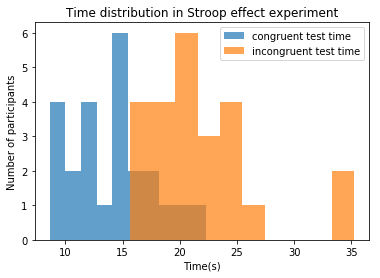

In [10]:
plt.hist(df.Congruent, alpha = 0.7, label = 'congruent test time')
plt.hist(df.Incongruent, alpha = 0.7, label = 'incongruent test time')
plt.xlabel('Time(s)')
plt.ylabel('Number of participants')
plt.title('Time distribution in Stroop effect experiment')
plt.legend()
plt.show()

- We can see from the distribution for the time response in the experiment that we have an overlap in the time 
- The incongruent test histgram is skewed to the left compared to the congruent which is expected since the first had a mean of 21 seconds while the incongruent had a mean repsonse time of 14 seconds.
- this figure shows the differences in the mean response time for both stimuli types but this can be confirmed after the analysis is done. 

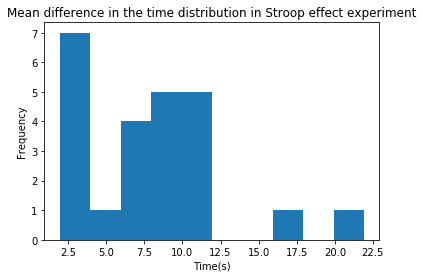

In [11]:
mean_difference = df.Incongruent - df.Congruent
plt.hist(mean_difference);
plt.xlabel('Time(s)')
plt.ylabel('Frequency')
plt.title('Mean difference in the time distribution in Stroop effect experiment');

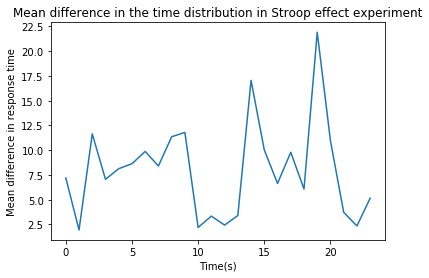

In [13]:
plt.plot(mean_difference);
plt.xlabel('Time(s)')
plt.ylabel('Mean difference in response time')
plt.title('Mean difference in the time distribution in Stroop effect experiment');

In [14]:
print(mean_difference.min(),'minimum difference')
print(mean_difference.max(),'maximum difference')

1.95 minimum difference
21.919 maximum difference


The histogram and the line chart shows the difference between incongruent and congruent is above zero with a range between 1.95 seconds to 21.919 seconds.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

for this $\alpha = .05$. i will bootstrap the difference in mean response time for both congruent and incongruent 

In [15]:
import scipy.stats as stats

In [16]:
# paired t-test 
stats.ttest_rel(df.Congruent, df.Incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [20]:
# calculate t-crictical for confidence level of 95% and degrees of freedom
# of sample_size - 1
n = df.shape[0]-1
t_critical = stats.t.ppf(q = 0.975, df = n)
t_critical

2.0686576104190406

based on ttest_rel results and t-critical value:
- for confidence level of 95% and 23 degrees of freedom:
    - t-statistic = -8.020706944109957
    - p-value = 4.1030005857111781e-08 << 0.05
    - t-critical = 2.0686576104190406
- since the pvalue is less than $\alpha$ of 0.05. we can reject the null hypothesis. this match with the analysis and the plots done in the previous steps. 
- the t-statistic is much larger than the critical value. 
- the negative is sign in t-statisitic emphasis the difference in the null hypothesis (towards which direction the difference is more) and this shows that the diffrence is higher than the null which is 0
- This means that when the words are congrunt with the words ink color the response time is different.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

one of the theories explaining this is that the word processing speed is faster than recognising the colors.

Resources: 
https://en.wikipedia.org/wiki/Stroop_effect
https://www.investopedia.com/terms/t/two-tailed-test.asp
https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
